Привет, Кирилл!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

# Исследование о продаже игр магазина "Стримчик"

### Содержание:

1.Изучение общей информации, предварительный просмотр данных

1.1 Импортируем все нужные библиотеки

1.2 Загрузка файла и предварительный просмотр данны

2.Подготовка данных

2.1. Замена названий столбцов

2.2. Преобразование данных в нужные типы, обработка пропусков

2.3. Суммарные продажи во всех регионах

3.Исследовательский анализ данных

3.1. Cколько игр выпускалось в разные годы

3.2. Как менялись продажи по платформам

3.3. Установка актуального периода, определение актуальных платформ

3.4. Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

3.5. Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

3.6. Распределение игр по жанрам

4.Составление портрета пользователя каждого региона

4.1. Самые популярные платформы (топ-5)

4.2. Самые популярные жанры (топ-5)

4.3. Проверка влияния рейтинга ESRB на продажи в отдельном регионе

5.Проверка гипотез 

6.Общий вывод

<b>Цель исследования</b> - выполнить предобработку данных и изучить их, чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>Исходные данные</b> - данные магазина "Стримчик" за 2016 год.

<b>Вопросы, интересующие в исследовании:</b>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

- Самые популярные жанры (топ-5). Поясните разницу.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

**Описание данных**

- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы проданных копий)

- EU_sales — продажи в Европе (миллионы проданных копий)

- JP_sales — продажи в Японии (миллионы проданных копий)

- Other_sales — продажи в других странах (миллионы проданных копий)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Спасибо тебе за небольшое оглавление к проекту. 

## 1. Изучение общей информации, предварительный просмотр данных 

#### 1.1. Импортируем все нужные библиотеки

In [459]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sp
import missingno as msno

####  1.2. Загрузка файла и предварительный просмотр данных

In [460]:
try:
    data = pd.read_csv('D://games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [461]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хорошее начало. Библиотеки импортированы и получена первичная информация о нем. 

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** Имеем 11 колонок и 16715 записей, в некоторых столбцах обнаружены пропуски как значительные, так и не очень.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово. С данными ознакомились и можем идти дальше. 

## 2. Подготовка данных

#### 2.1. Замена названий столбцов 

Приведем все названия столбцов к нижнему регистру

In [463]:
data.columns = map(str.lower, data.columns)

In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший способ приведенияк нижнему регистру. 

#### 2.2. Преобразование данных в нужные типы, обработка пропусков

In [465]:
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = data.isna()
data['user_score'] = data['user_score'].astype('float64')

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

**Замена значения tbd на NaN** в этой ситуации будет единственных правильным вариантом, чтобы преобразовать столбец в другой тип.

In [466]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<AxesSubplot:>

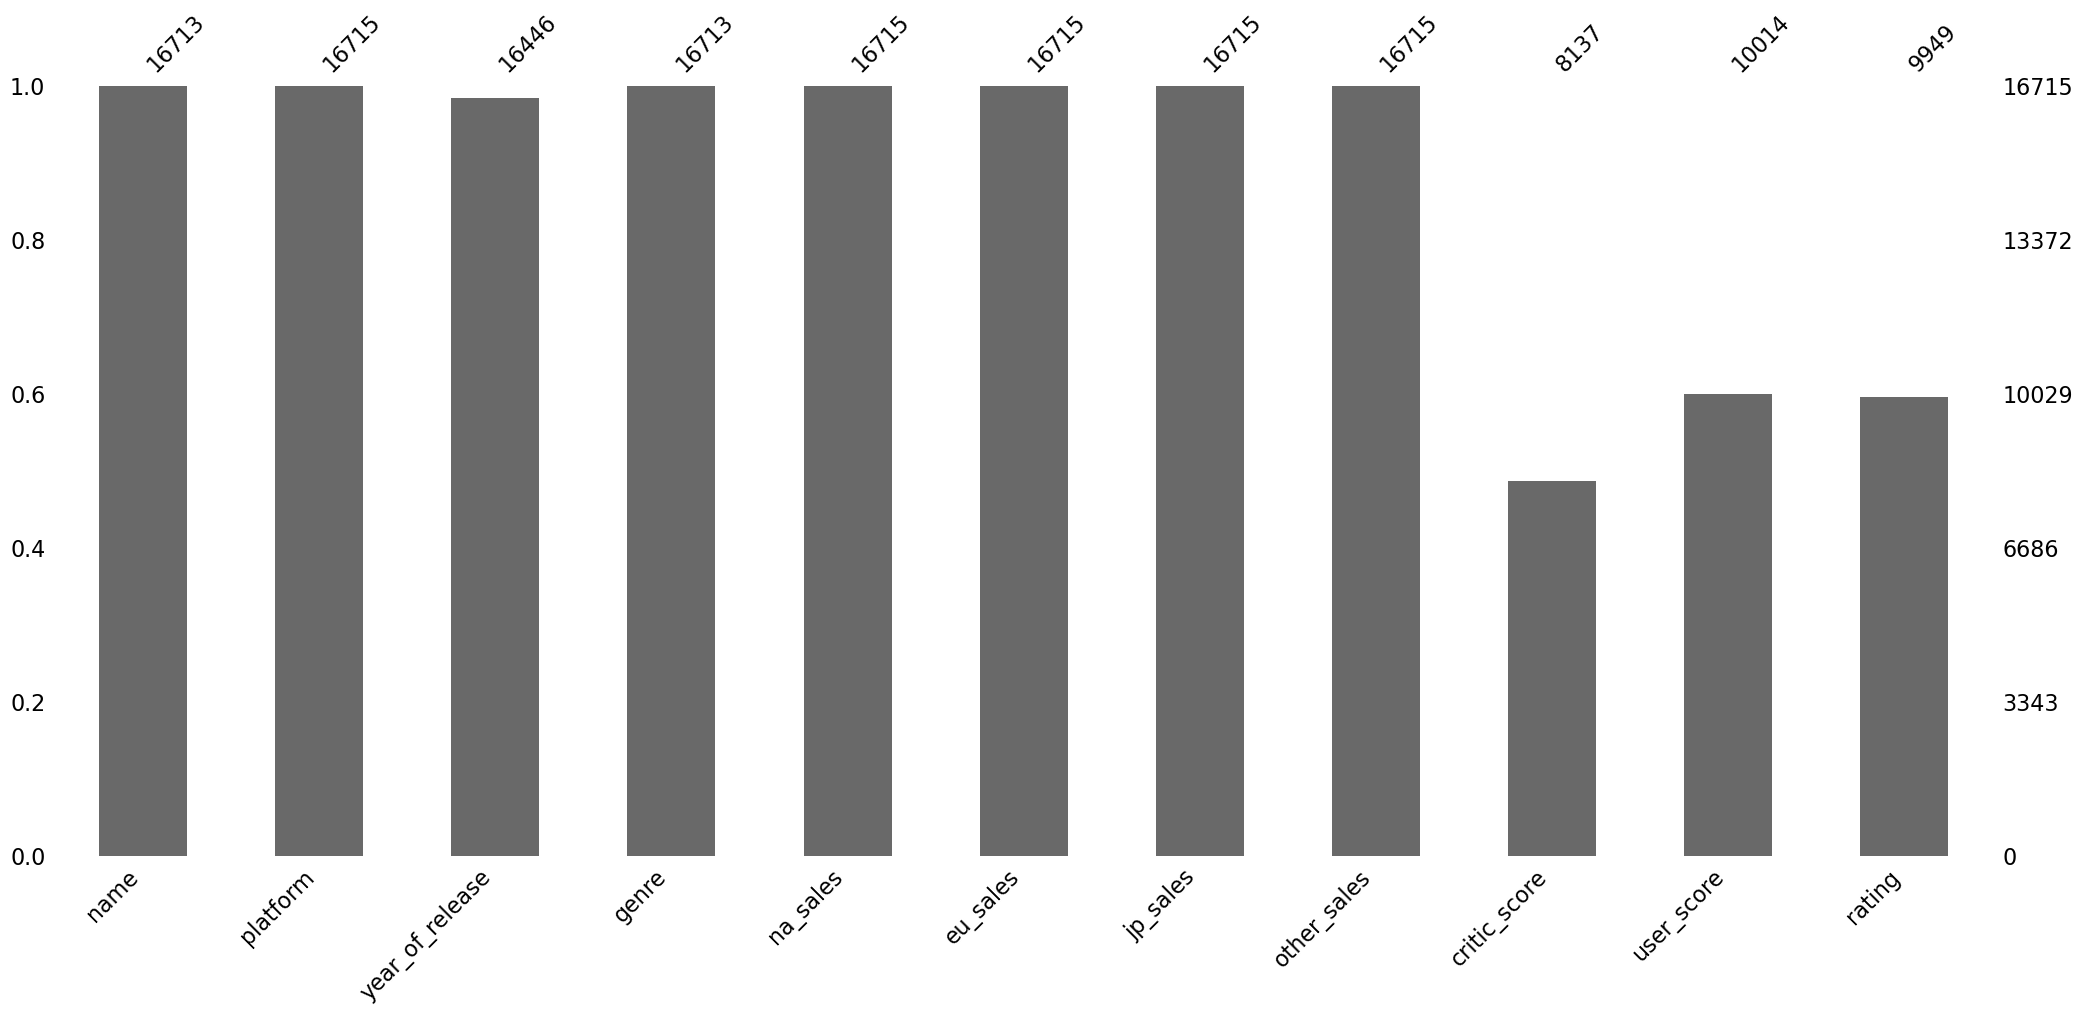

In [467]:
msno.bar(data)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков можешь использовать такую библиотеку https://russianblogs.com/article/5001266235/

<div class="alert alert-block alert-info">
    
Первый раз услышал про эту библиотеку, спасибо за информацию!
    
</div>

Выяснив количество пропусков в каждом столбце можно определить какие строки лучше удалить, а какие постараться заполнить.
В столбцах **name** и **genre** справедливо удалить записи, на ход исследвания это никак не повлияет.
В столбце **year_of_release** пропуски составляют 1.6% от общего количества, их удаление также обосновано.

In [468]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])
data = data.dropna(subset=['year_of_release'])

In [469]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Соглашусь. Тут пропусков было мало в этих столбцах и логично от них избавиться. 

Также заменим тип данных в столбце **year_of_release** на int для экономии памяти

In [470]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [471]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


#### 2.3. Суммарные продажи во всех регионах

Вычислим суммарные продажи во всех регионах и запишем их в отдельный столбец

In [472]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А еще тут можно таким способом суммировать `df['x'] = df[['a', 'b', 'c']].sum(axis=1)`

<div class="alert alert-block alert-info">
    
Учел
    
</div>

**Вывод:** Таким образом после обработки данных, удаления некоторого количества строк из 16715 остается 16444, что составляет **98.4%** от общего объема. Также оставить пропуски в столбцах **crtitic_score**,**user_score** и **rating** считаю оправданным, т.к. заполнение даже медианными значениями может сильно повлиять на итоговые выводы, потому что оценки пользователей слишком субъективны и зависят от множества факторов, оценку критиков также сложно спрогнозировать.

**Причины появления пропусков:**

В столбцах **name**, **genre** пропуски, на мой взгляд, вызваны человеческим фактором, т.к. это слишком маленький процент от общего числа игр.

В столбце **year_of_release** пропуски обусловлены также человеческим фактором, видимо, кто-то просто не захотел заполнять эту графу.

Данные в **user_score**  пропущены, скорее всего, потому что пользователи, не всегда дают оценку продукту, также, возможно, что игра не пользуется большой популярностью и в следствии разных оценок выразить общую картину слишком сложно.

В колонке **crtitic_score** значение пропущены, частично, по той же причине, что и **user_score**, однако эти данные заполняются менеджерами сайта, возможно, кто-то просто не нашел отзывов на игру от известных изданий вроде Метакритики, и посчитал, что эту графу можно не заполнять. Думаю такая же ситуация и со столбцом **rating**.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отличная предобработка получилась. Теперь данные готовы к дальнейшему исследованию. По поводу замены пропусков в оценках согласен. Там оптимально никак не заменить и лучше оставить как есть. 

## 3. Исследовательский анализ данных

#### 3.1. Cколько игр выпускалось в разные годы

In [473]:
data['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

<AxesSubplot:>

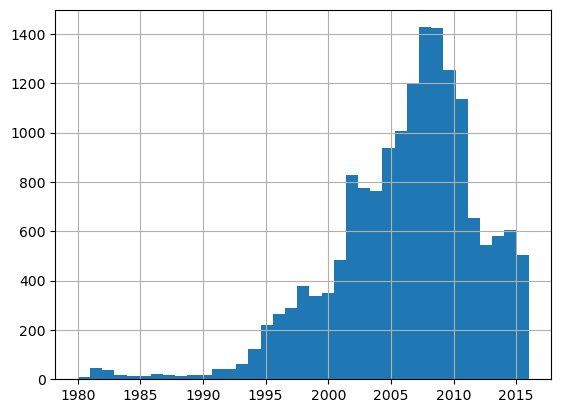

In [474]:
data['year_of_release'].hist(bins=37)

Всего после удаления данных, как уже было сказано с **1980 по  2016** года у нас осталось **16 444 игр**, из которых большая часть, а именно **10 752**, была выпущена с **2002 по 2011** года.

Также данные до **1993** года включительно нам не особо интересны, можно отнести эту стадию зарождением игровой индустрии.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Информативный график вышел. После 2009 года пошло падение, которое связано с популяризацией мобильных игр. 

#### 3.2. Как менялись продажи по платформам

In [475]:
platform = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
platform.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sum_sales, dtype: float64

<AxesSubplot:ylabel='platform'>

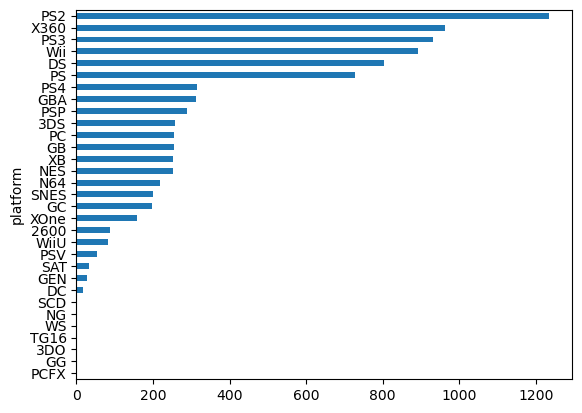

In [476]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=True).plot(kind='barh')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут бы еще визуаилазацию сделать. Так результат будет восприниматься лучше

<div class="alert alert-block alert-info">
    
Добавил визуализацию
    
</div>

Выделить можно **шесть** лидеров: **PS2 , X360 , PS3 , Wii , DS , PS**. Также построим к ним диаграммы. 

In [477]:
PS2 = data[data['platform'] == 'PS2']
X360 = data[data['platform'] == 'X360']
PS3 = data[data['platform'] == 'PS3']
Wii = data[data['platform'] == 'Wii']
DS = data[data['platform'] == 'DS']
PS = data[data['platform'] == 'PS']
list1 = [PS2,X360,PS3,Wii,DS,PS]

<AxesSubplot:ylabel='Frequency'>

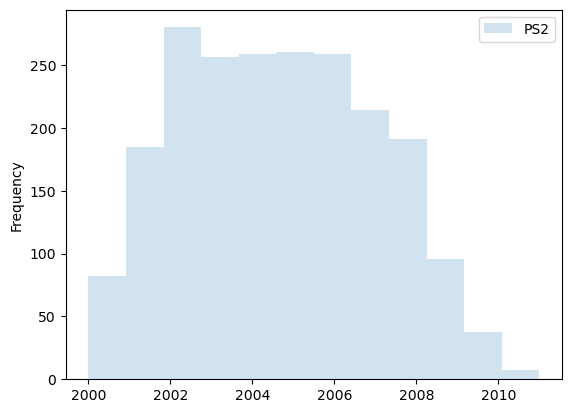

In [478]:
PS2.plot(x='sum_sales', y='year_of_release', kind='hist', bins=PS2['year_of_release'].nunique(), label='PS2', alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

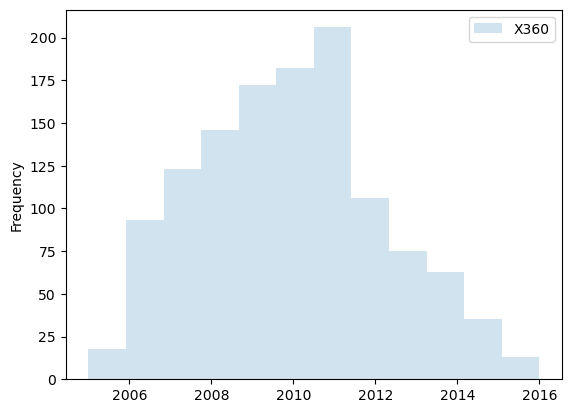

In [479]:
X360.plot( x='sum_sales', y='year_of_release', kind='hist', bins=X360['year_of_release'].nunique(), label='X360', alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

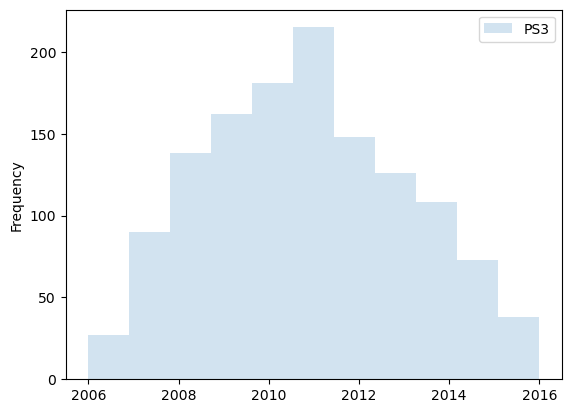

In [480]:
PS3.plot( x='sum_sales', y='year_of_release', kind='hist', bins=PS3['year_of_release'].nunique(), label='PS3', alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

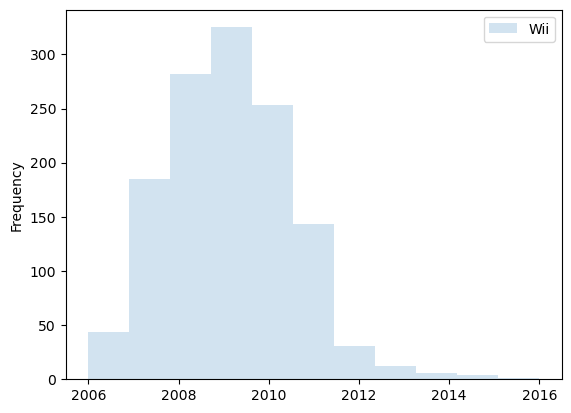

In [481]:
Wii.plot( x='sum_sales', y='year_of_release', kind='hist', bins=Wii['year_of_release'].nunique(), label='Wii', alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

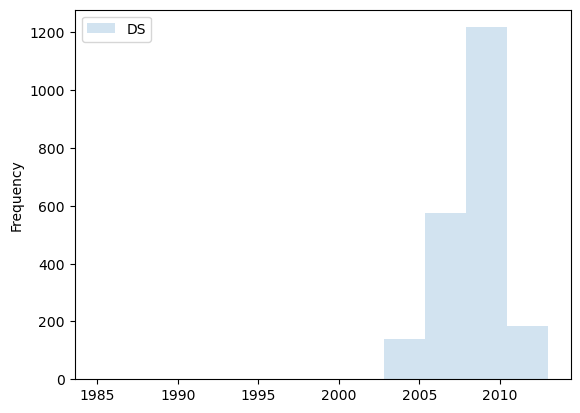

In [482]:
DS.plot( x='sum_sales', y='year_of_release', kind='hist', bins=DS['year_of_release'].nunique(), label='DS', alpha=0.2)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Все эти графики можно было вывести через цикл. Так бы не пришлось лишний раз копипастить. 

<div class="alert alert-block alert-info">
    
Попытался вывести все через цикл, не очень понравился формат с скроллом ползунка по множеству диаграмм, решил оставить все как есть, учту в следующей работе.
    
</div>

Выявлено аномальное значение на диаграмме с игрой у которой дата релиза 1985 год, хотя коносль выпущена в 2004, удалим эту строку

In [483]:
DS[DS['year_of_release']== 1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [484]:
data.drop(index=15957, axis=0, inplace=True)

In [485]:
DS.drop(index=15957, axis=0, inplace=True)

C:\Users\corti\AppData\Local\Temp\ipykernel_11456\1687262176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DS.drop(index=15957, axis=0, inplace=True)


<AxesSubplot:ylabel='Frequency'>

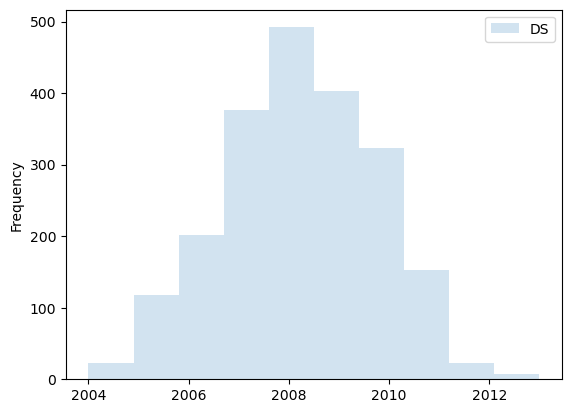

In [486]:
DS.plot( x='sum_sales', y='year_of_release', kind='hist', bins=DS['year_of_release'].nunique(), label='DS', alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

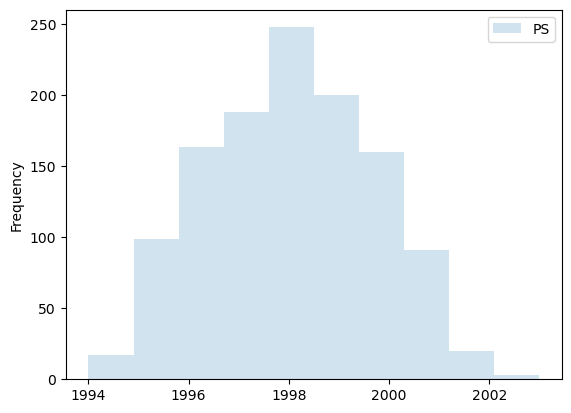

In [487]:
PS.plot( x='sum_sales', y='year_of_release', kind='hist', bins=PS['year_of_release'].nunique(), label='PS', alpha=0.2)

**Вывод:** Таким образом, рассмотрев 6 самых популярных платформ за все время можно сказать, что примерная продолжителность "жизни" устройства - 10 лет. Также на продолжительность жизни влияет выход следующего поколения. Это можно видеть на примере семейства **PS**. Графики представляют собой нормальное распределение.

#### 3.3. Установка актуального периода, определение актуальных платформ

Рассмотрим вопрос актуальности периода на основании текущих платформ и их актуальности. Начнем с примерных двух лет и будем отталкиваться от этой цифры, в последствии это значение может измениться

In [488]:
actually = data[data['year_of_release'] >=2015].pivot_table(index=['platform'], values='sum_sales', aggfunc=sum)
# В последствии рассматривая период от 2013, 2014 годов пришел к выводу, что данный "топ" не сильно изменяется, можно взять
# и более обширный период, на нем даже можно пронаблюдать потерю актуальности некоторых платформ
# в то время как другие ее наоборот набирают
actually = actually.sort_values(by='sum_sales', ascending=False)
actually.head(10)

,sum_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
У нас все же данные не за весь 2016 год. Давайка мы чуть расширим выводу и еще хотя бы 2014 год сюда включим. 

<div class="alert alert-block alert-info">
    
Дело в том, что если я ставлю 2014 год, то в топе появляются две устаревшие платформы(X360, PS3), решил для себя сразу убрать их без лишних заморочек, но на будущее учту.
    
</div>

<AxesSubplot:ylabel='platform'>

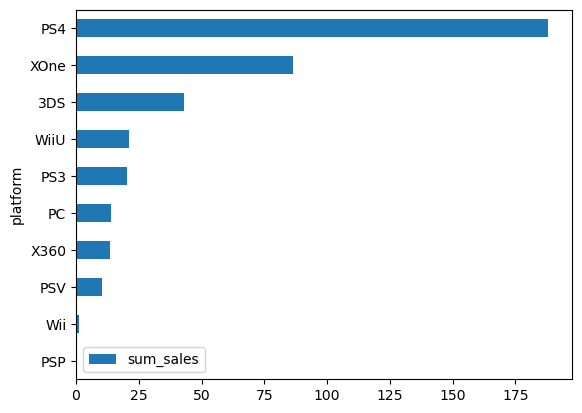

In [489]:
actually = actually.sort_values(by='sum_sales', ascending=True)
actually.plot(kind='barh')

Итак, рассмотрев график и данные можно сделать следующие **выводы:**

- На данный момент самая популярная платформа **PS4**, за ней следуют **XOne**, **3DS**, **WiiU** и **PC**, ранее не выявленные в ходе исследования.

- С наличием более старших моделей, таких как **PS4** и **XOne** рассмотрение данных с **PS3** и **X360** считаю не целесообразным, поскольку их можно считать просто не актуальными в нынешних реалиях и близжайшем будущем.

- Также возьмем за примерное время "жизни" платформы уже известную нам цифру из исследований - **10 лет**.

Исходя из этого можно сформировать актуальный список платформ, игры на которых будут еще покупаться в близжайшее время, а именно:

- **PS4**

- **XOne**

- **3Ds**

- **WiiU**

- **PC**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С выводом соглашусь. 

#### 3.4. Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и сделаем выводы.

In [490]:
top_platforms = data.query("platform in ('PS4','PC', '3DS', 'WiiU', 'XOne')").sort_values(by='sum_sales')
top_platforms.pivot_table(index='platform', values='sum_sales', aggfunc='sum')

,sum_sales
platform,
3DS,257.81
PC,255.76
PS4,314.14
WiiU,82.19
XOne,159.32


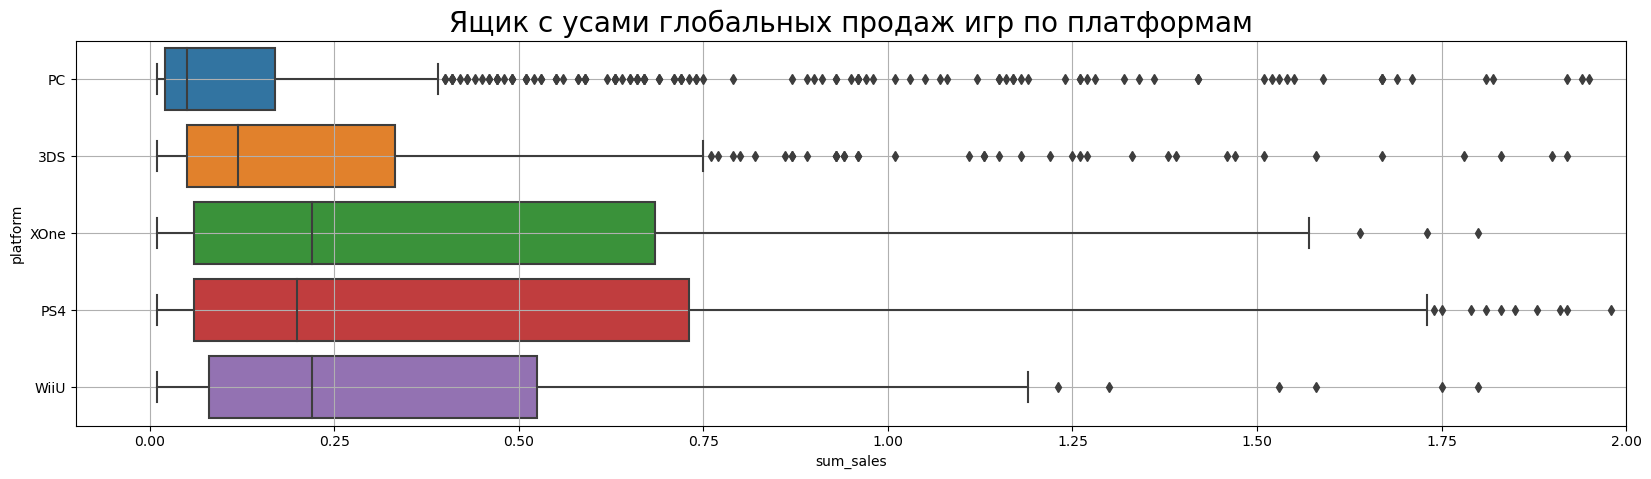

In [491]:
plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('Ящик с усами глобальных продаж игр по платформам', fontsize=20)
sns.boxplot(x='sum_sales', y='platform', data=top_platforms, orient='h')
plt.ylabel('platform')
plt.xlabel('sum_sales')
plt.grid(True);

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут отдельно хочу отметить то, что тобой ограничен вывод выбросов. Теперь нам отчетливо видно медиану и квантили. 

По данному боксплоту можно сделать следующий **вывод:**

- Игровая платформа PC актуальна во все времена, что неудивительно, в ПК меняют только комплектующие а не полностью платформу, что на руку игровым производителям.

- Самыми популярными остаются игровые консоли 3Ds, PS4 и XOne, что, опять же, не удивительно, ведь это самые популярные игровые платформы в мире.

#### 3.5. Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постром диаграммв рассеяния и посчитаем корреляцию между отзывами и продажами.

In [492]:
corr_df = data[['platform', 'critic_score', 'user_score', 'sum_sales']].copy()
PC = corr_df[corr_df['platform'] == 'PC']
Ds = corr_df[corr_df['platform'] == '3DS']
XOne = corr_df[corr_df['platform'] == 'XOne']
PS4 = corr_df[corr_df['platform'] == 'PS4']
WiiU = corr_df[corr_df['platform'] == 'WiiU']

In [493]:
PC.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.547307,0.257395
user_score,0.547307,1.000000,0.062628
sum_sales,0.257395,0.062628,1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='sum_sales'>]],
      dtype=object)

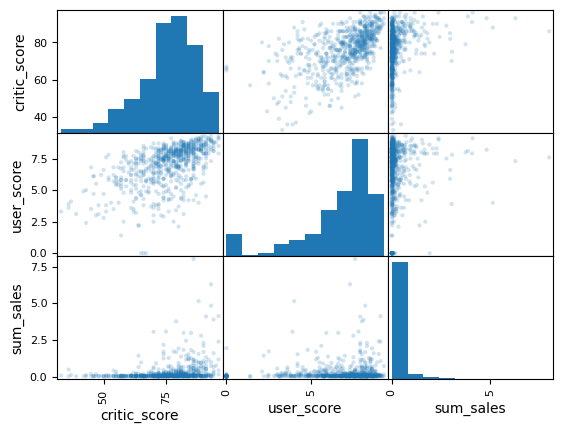

In [494]:
pd.plotting.scatter_matrix(PC, alpha=0.2)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ты выбрал оптимальный график для рассмотрения зависимости продаж от оценок. 

In [495]:
Ds.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.634312,0.348740
user_score,0.634312,1.000000,0.258083
sum_sales,0.348740,0.258083,1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='sum_sales'>]],
      dtype=object)

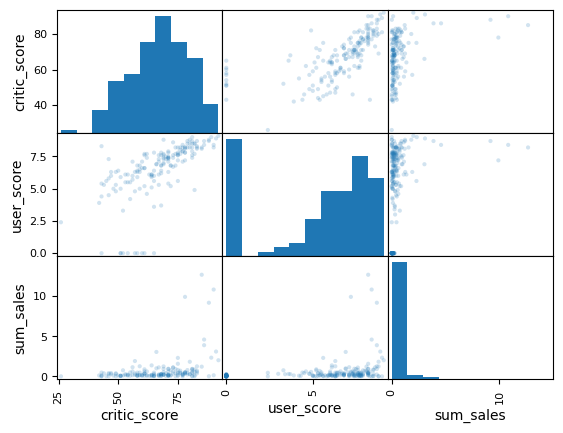

In [496]:
pd.plotting.scatter_matrix(Ds, alpha=0.2)

In [497]:
XOne.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.465368,0.416998
user_score,0.465368,1.000000,0.074486
sum_sales,0.416998,0.074486,1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='sum_sales'>]],
      dtype=object)

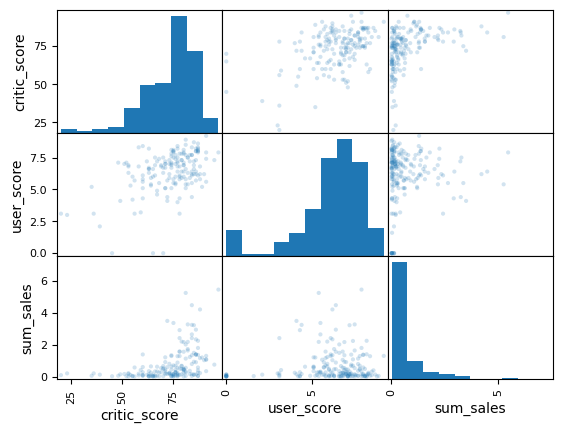

In [498]:
pd.plotting.scatter_matrix(XOne, alpha=0.2)

In [499]:
PS4.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.520752,0.406568
user_score,0.520752,1.000000,0.023279
sum_sales,0.406568,0.023279,1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='sum_sales'>]],
      dtype=object)

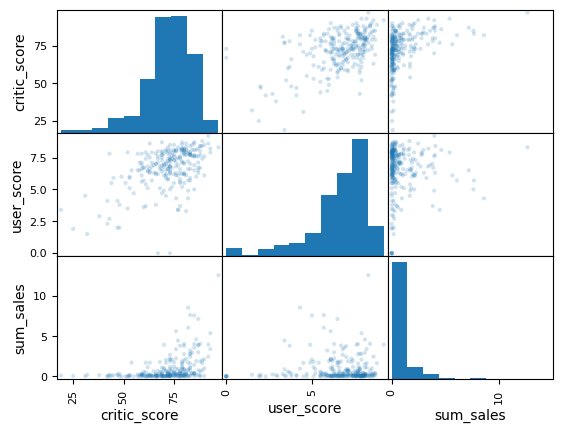

In [500]:
pd.plotting.scatter_matrix(PS4, alpha=0.2)

In [501]:
WiiU.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.657313,0.348380
user_score,0.657313,1.000000,0.354087
sum_sales,0.348380,0.354087,1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='sum_sales'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='sum_sales'>]],
      dtype=object)

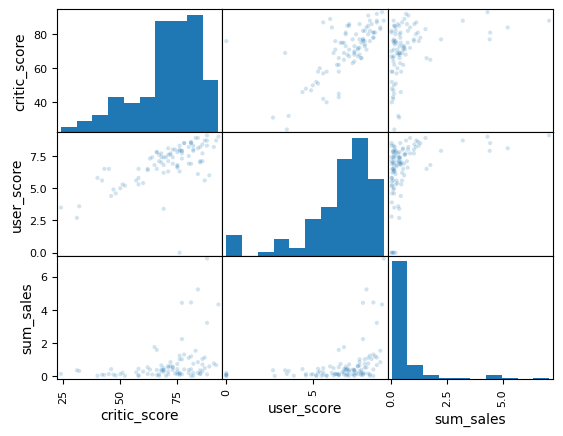

In [502]:
pd.plotting.scatter_matrix(WiiU, alpha=0.2)

**Выводы:**

- **Корреляция** между отзывами и продажами **доказана** на **всех платформах**, согласно диаграммам рассеяния и полученным математическим данным.

- Чем больше у игры **положительных** отзывов, тем лучше она **продается**.

- **Больше всего** на продажу влияют **отзывы критиков**, это видно по полученным математическим данным(*Исключением является платформа WiiU, там корреляция между отзывами пользователей и суммой продаж выше, чем между отзывами критиками и суммой продаж)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы на основе графиков с нескольких платформ выглядят убедительнее. 

#### 3.6. Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. 
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

In [503]:
genre = data.pivot_table(index='genre', values='sum_sales', aggfunc=['count','median'])
genre = genre.reindex(genre['median'].sort_values(by='sum_sales', ascending=False).index)
genre

,count,median
,sum_sales,sum_sales
genre,,
Platform,878,0.27
Shooter,1296,0.24
Sports,2306,0.22
Fighting,837,0.21
Action,3306,0.19
Racing,1226,0.19
Role-Playing,1481,0.18
Misc,1721,0.16


<AxesSubplot:ylabel='genre'>

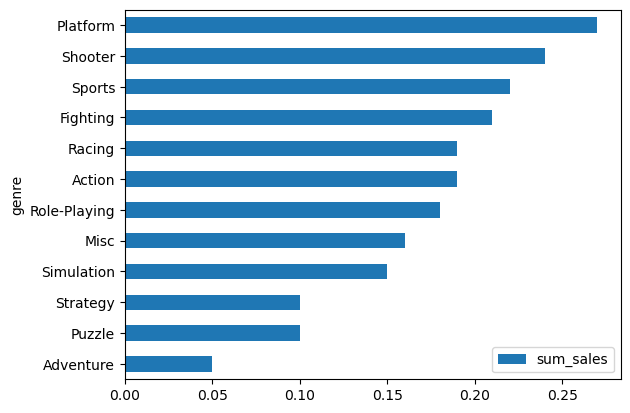

In [504]:
genre['median'].sort_values(by='sum_sales', ascending=True).plot(kind='barh')

**Выводы:**

- Самый прибыльный жанр - платформеры, видимо, из-за возможности портировать игру сразу на несколько устройств, таким образом мы имеем больший охват аудитории.

- Самым не прибыльним жанром оказался жанр Приключения. Думаю это связано большим количеством малых и не популярных инди-проектов.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи

<div class="alert alert-block alert-info">
    
Изменил вывод, учел замечание. В качестве функции взял медиану, т.к. она менее подвержена выбросам. 
    
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Видишь, тут и вывод изменился

## 4. Составьте портрет пользователя каждого региона

#### 4.1. Самые популярные платформы (топ-5)

Определим самые популярные платформы(топ-5) для каждого региона. Считаю что рассматривать суммы продаж за все года **не целесообразно**, ведь мы хотим узнать текущее положение дел и сделать выводы для принятия решений и развития кампании на 2017 год.

In [505]:
actually_df = data.loc[data['year_of_release'] >= 2015]
actually_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05
PS3,5.66
PC,3.72
PSV,0.54
Wii,0.49


<AxesSubplot:title={'center':'Северная Америка'}, ylabel='platform'>

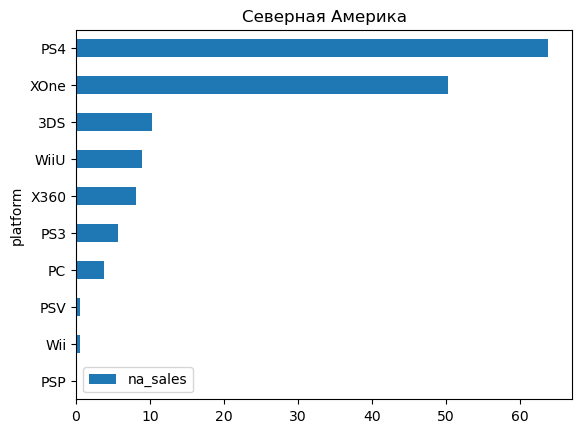

In [506]:
actually_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=True).plot(kind='barh', title='Северная Америка')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Не забывай давать графикам названия. Так сразу будет понятно что ты хочешь на них показать. Сделать это можно параметром title()

<div class="alert alert-block alert-info">
    
Дал всем графикам название согласно их региона. 
    
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Так намного лучше

In [507]:
actually_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30
WiiU,6.49
X360,4.21
PSV,1.08
Wii,0.73


<AxesSubplot:title={'center':'Европа'}, ylabel='platform'>

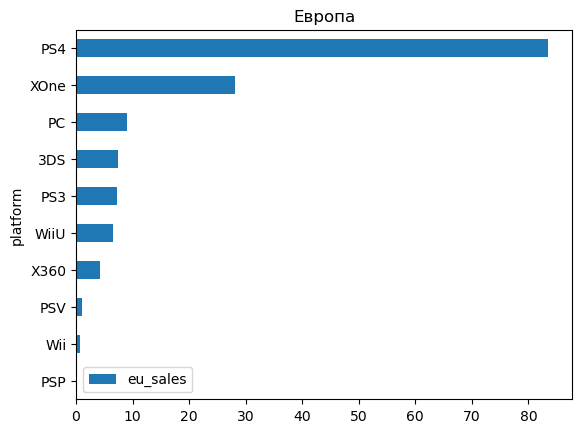

In [508]:
actually_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=True).plot(kind='barh', title='Европа')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Европа в чем-то даже похожа на Северную Америку. 

In [509]:
actually_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12
XOne,0.18
PSP,0.12
PC,0.00
Wii,0.00


<AxesSubplot:title={'center':'Япония'}, ylabel='platform'>

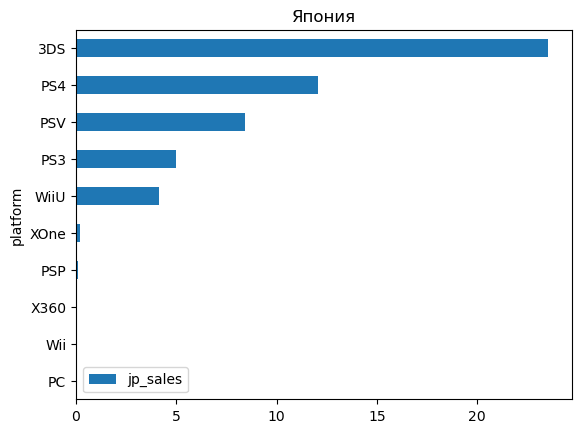

In [510]:
actually_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=True).plot(kind='barh', title='Япония')

**Выводы:**
- Самой популярной платформой в Северной Америке и Европе оказалась **PS4**, а вот в Японии больше всего покупок у платформы **3DS**
- Второй по популярности также в Европе и Северной Америке является консоль **XOne**, в Японии же это место занимает **PS4**
- В целом можно сделать вывод о по **Японскому рынку**. Они предпочитают консоли собственного производства. Лидирующие позиции держат компании **Nintendo** и **Sony**, и только после всех идет малая доля продаж на **XOne**
- В Америке же пользователи предпочитают **консольный гейминг**, люди чаще всего берут игры на **PS4** и **XOne**, затем с сильным отрывом идут **портативные консоли**
- Пользователи Европы предпочитают платформу **PS4**, в сравнении с остальными продажами она занимает больше половины рынка

#### 4.2. Самые популярные жанры (топ-5)

Определим самые популярные жанры(топ-5) для каждого региона. Также не будем рассматривать информацию за все года, а возьмем период, который мы брали для составления топа по платформам.

In [511]:
actually_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58
Fighting,5.54
Adventure,3.84
Platform,3.78
Racing,2.82


<AxesSubplot:title={'center':'Северная Америка'}, ylabel='genre'>

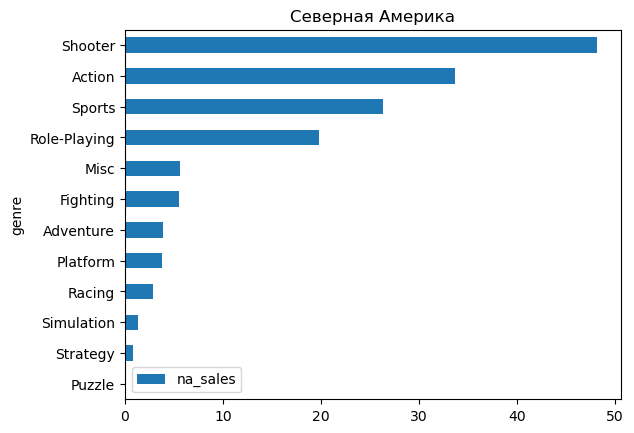

In [512]:
actually_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=True).plot(kind='barh', title='Северная Америка')

In [513]:
actually_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52
Adventure,4.67
Misc,4.26
Simulation,3.74
Fighting,3.72


<AxesSubplot:title={'center':'Европа'}, ylabel='genre'>

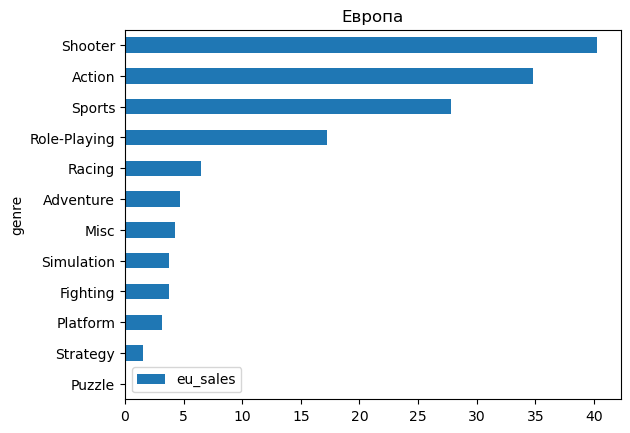

In [514]:
actually_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=True).plot(kind='barh', title='Европа')

In [515]:
actually_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22
Simulation,1.93
Sports,1.65
Fighting,1.54
Platform,1.42


<AxesSubplot:title={'center':'Япония'}, ylabel='genre'>

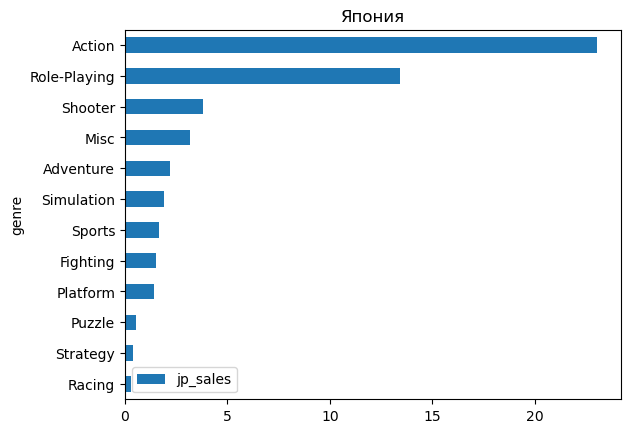

In [516]:
actually_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=True).plot(kind='barh', title='Япония')

**Выводы:**
- В жанровом понимании пользователи **Северной Америки** и **Европы**, в целом, похожи, первые 4 места(*Shooter, Action, Sport, Role-Playing*) у них совпадают, возможно из-за схожего **"игрового менталитета"**. Даже по количеству продаж они, приблизительно, совпадают
- В **Японском регионе** наблюдается различие с **Европейским** и **Североамериканским**. Первое место, конечно же, это **Action** игры, а вот после идут жанры **Role-Playing**, **Shooter**, **Misc**, **Adventure**. Думаю, что в первую очередь это связано с различиями в культурах, интересах и опять же **"игровом менталитете"**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот тут вышло, что Япония наиболее уникальна среди всех регионов. 

#### 4.3. Проверка влияния рейтинга ESRB на продажи в отдельном регионе

Влияет ли рейтинг ESRB на продажи в отдельном регионе? Здесь также рассмотрим только период, бравшийся в исследованиях выше.

In [517]:
actually_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,47.03
E,26.59
T,22.86
E10+,17.87


<AxesSubplot:title={'center':'Северная Америка'}, ylabel='rating'>

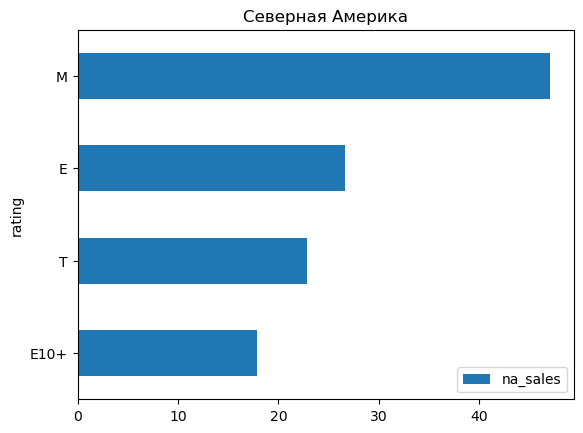

In [518]:
actually_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=True).plot(kind='barh', title='Северная Америка')

In [519]:
actually_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,45.54
E,34.83
T,20.32
E10+,11.54


<AxesSubplot:title={'center':'Европа'}, ylabel='rating'>

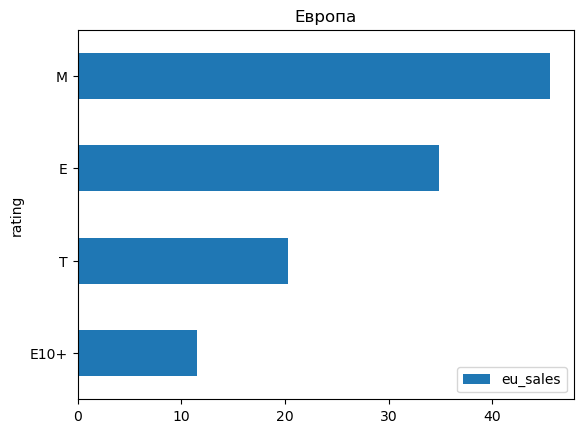

In [520]:
actually_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=True).plot(kind='barh', title='Европа')

In [521]:
actually_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
T,7.70
E,5.25
M,4.29
E10+,3.27


<AxesSubplot:title={'center':'Япония'}, ylabel='rating'>

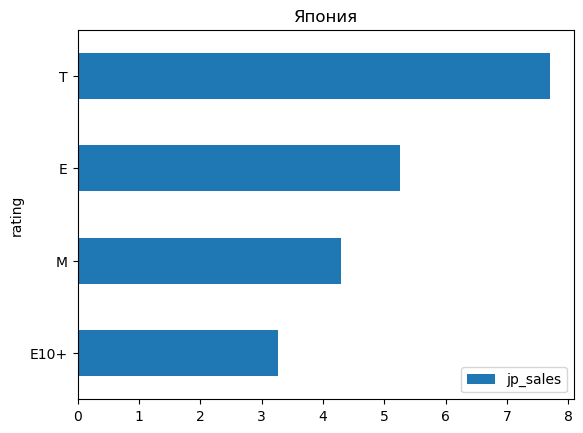

In [522]:
actually_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=True).plot(kind='barh', title='Япония')

**Выводы:**
- Из полученных данных можно сделать вывод о том, что пользователи из **Европы** и **Северной Америки** чаще всего покупают игры **"рекомендовано для взрослых"**, затем по популярности идут игры **"общей возрастной группы"**, **"для подростковой"**, и последняя группа - **"для всех от 10 лет"**
- В **Японии** же лидируют по продажам игры с рейтингом **"для подростков"**, затем **"общей возрастной категории"**. Игры с рейтингом **"рекомендовано для взрослых"** и **"для всех от 10 лет"**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Мы теперь точно будем учитывать региональные особенности каждой территории при прогнозе продаж на 2017. 

## 5.Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые? Проверим.

Параметр **alpha** установим в **0.05**.

In [523]:
alpha = .05

In [524]:
platform_data = data[['platform', 'user_score']].copy().dropna(subset='user_score').reset_index(drop=True)

In [525]:
print('Размер совокопуности для XOne -', len(platform_data[platform_data['platform']=='XOne']))
print('Размер совокопуности для PC -', len(platform_data[platform_data['platform']=='PC']))
stat, p = sp.stats.levene(platform_data.query('platform == "XOne"')['user_score'],
                 platform_data.query('platform == "PC"')['user_score'])

print('\nЗначение p-value: ', p)

if p > alpha:
    print('Дисперсии выборок равны')
else:
    print('Дисперсии выборок не равны')

Размер совокопуности для XOne - 193
Размер совокопуности для PC - 804

Значение p-value:  0.26573125045360724
Дисперсии выборок равны


Установив что дисперсии равны, а генеральные совокупности слишком различаются сделаем их тоже равными.

In [526]:
XOne = platform_data[platform_data['platform']=='XOne']['user_score']
PC = platform_data[platform_data['platform']=='PC']['user_score']
PC = PC.sample(n=193)

In [527]:
results = sp.stats.ttest_ind(XOne, PC)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.01957322514757555
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верно определен метод проверки и сформулированы гипотезы

**Вывод:** Пользовательские рейтинги у платформ **XOne** и **PC** **равны**, нулевую гипотезу можно не отвергать.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Тут я согласен со всем, кроме вывода. В Статистике "Подтвердить" гипотезу невозможно. Мы можем ее только отвергнуть или не отвергнуть.

<div class="alert alert-block alert-info">
    
Изменил вывод, учел замечание.
    
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Шикарно получилось

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

In [528]:
genre_data = data[['genre', 'user_score']].copy().dropna(subset='user_score').reset_index(drop=True)

In [529]:
print('Размер совокопуности для Action -', len(genre_data[genre_data['genre']=='Action']))
print('Размер совокопуности для Sports -', len(genre_data[genre_data['genre']=='Sports']))
stat, p = sp.stats.levene(genre_data.query('genre == "Action"')['user_score'],
                 genre_data.query('genre == "Sports"')['user_score'])

print('\nЗначение p-value: ', p)

if p > alpha:
    print('Дисперсии выборок равны')
else:
    print('Дисперсии выборок не равны')

Размер совокопуности для Action - 2164
Размер совокопуности для Sports - 1487

Значение p-value:  3.791160880599886e-17
Дисперсии выборок не равны


В этом тестировании дисперсии и генеральные совокупности не равны, а значит следует установить параметр **equal_var=False**

In [530]:
results = sp.stats.ttest_ind(genre_data[genre_data['genre']=='Action']['user_score'],
                            genre_data[genre_data['genre']=='Sports']['user_score'],
                            equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5747937939693534e-13
Отвергаем нулевую гипотезу


**Вывод:** Пользовательские рейтинги у жанров **Action** и **Sports** **разные**, можно отвергать нулевую гипотезу.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут все отлично получилось и вывод тоже:) 

## 6. Общий вывод

**В самом начале проекта мы:**

- ознакомились с первичным форматом данных

- выполнили предварительную оценку данных

**По ходу первоначального анализа было выявлено:**

- 16715 строк с данными о играх (из которых после предобработки осталось 16444)

**Также было обнаружено:**

- ряд данных с пропущенными и некоторые данные с аномальными значениями

- неккректная запись столбцов, привели к нижнему регистру


**В ходе второй части работы была произведена:**

- обработка данных и фильтрация от некоторых аномальных значений

- удалены пропущенные значения


**Исследовательский анализ третьей части дал возможность сделать выводы:**

- большая часть игр, а именно 10 752, была выпущена с 2002 по 2011 года.
- примерная продолжителность "жизни" устройства - 10 лет. Также на продолжительность жизни влияет выход следующего поколения. Это можно видеть на примере семейства **PS**. Графики представляют собой нормальное распределение
- на данный момент самая популярная платформа PS4, за ней следуют XOne, 3DS, WiiU и PC, ранее не выявленные в ходе исследования.

- с наличием более старших моделей, таких как PS4 и XOne рассмотрение данных с PS3 и X360 считаю не целесообразным, поскольку их можно считать просто не актуальными в нынешних реалиях и близжайшем будущем.

-  актуальный список платформ, игры на которых будут еще покупаться в близжайшее время, а именно:

    - PS4

    - XOne

    - 3Ds

    - WiiU

    - PC
- игровая платформа PC актуальна во все времена, что неудивительно, в ПК меняют только комплектующие а не полностью платформу, что на руку игровым производителям.

- самыми популярными остаются игровые консоли 3Ds, PS4 и XOne, что, опять же, не удивительно, ведь это самые популярные игровые платформы в мире.

- корреляция между отзывами и продажами доказана на всех платформах, согласно диаграммам рассеяния и полученным математическим данным.

- чем больше у игры положительных отзывов, тем лучше она продается.

- больше всего на продажу влияют отзывы критиков, это видно по полученным математическим данным(*Исключением является платформа WiiU, там корреляция между отзывами пользователей и суммой продаж выше, чем между отзывами критиками и суммой продаж)

- самый прибыльный жанр - платформеры, видимо, из-за возможности портировать игру сразу на несколько устройств, таким образом мы имеем больший охват аудитории.

- самым не прибыльним жанром оказался жанр Приключения. Думаю это связано большим количеством малых и не популярных инди-проектов

**Четвертая часть с составлением портрет пользователя каждого региона также дала понять некоторые вещи:**
- самой популярной платформой в Северной Америке и Европе оказалась **PS4**, а вот в Японии больше всего покупок у платформы **3DS**
- второй по популярности также в Европе и Северной Америке является консоль **XOne**, в Японии же это место занимает **PS4**
- в целом можно сделать вывод о по **Японскому рынку**. Они предпочитают консоли собственного производства. Лидирующие позиции держат компании **Nintendo** и **Sony**, и только после всех идет малая доля продаж на **XOne**
- в Америке же пользователи предпочитают **консольный гейминг**, люди чаще всего берут игры на **PS4** и **XOne**, затем с сильным отрывом идут **портативные консоли**
- пользователи Европы предпочитают платформу **PS4**, в сравнении с остальными продажами она занимает больше половины рынка
- в жанровом понимании пользователи **Северной Америки** и **Европы**, в целом, похожи, первые 4 места(*Shooter, Action, Sport, Role-Playing*) у них совпадают, возможно из-за схожего **"игрового менталитета"**. Даже по количеству продаж они, приблизительно, совпадают
- в **Японском регионе** наблюдается различие с **Европейским** и **Североамериканским**. Первое место, конечно же, это **Action** игры, а вот после идут жанры **Role-Playing**, **Shooter**, **Misc**, **Adventure**. Думаю, что в первую очередь это связано с различиями в культурах, интересах и опять же **"игровом менталитете"**
- из полученных данных можно сделать вывод о том, что пользователи из **Европы** и **Северной Америки** чаще всего покупают игры **"рекомендовано для взрослых"**, затем по популярности идут игры **"общей возрастной группы"**, **"для подростковой"**, и последняя группа - **"для всех от 10 лет"**
- в **Японии** же лидируют по продажам игры с рейтингом **"для подростков"**, затем **"общей возрастной категории"**. Игры с рейтингом **"рекомендовано для взрослых"** и **"для всех от 10 лет"**

**Основываясь на тестировании и проверке гипотез можно сказать:**
- Пользовательские рейтинги у платформ **XOne** и **PC** **равны**
- Пользовательские рейтинги у жанров **Action** и **Sports** **разные**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тот момент, когда итоговый вывод стал отличным дополнением проекта. С такими данными смело можем идти к заказчику и защищать результат. Ты описал достаточно много полезных инсайтов по рынку видеоигр. Теперь нам не составит труда составить прогноз продаж на 2017. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Поздравляю тебя с выполнением твоего первого Сборного проекта. Мне показалось, что работа выполненна прекрасно и ты здорово постарался. Понравилось, что ты хорошо владеешь отличными навыками Предобработки данных и проверки Гипотез. А еще особенно ценно, что ты везде пишешь аргументацию своим действиям. Так, если проект попадет в руки незнакомому человеку, он сможет разобраться. Это тебе очень пригодится в будущем.

В проекте осталось два замечания:
    
* Определить самый прибыльный жанр по медианному или среднему значению.
* Подправить выводы по гипотезам.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
    
    
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-info">

## Комментарий студента:
    
Спасибо большое за ревью, было интересно узнать про новую библиотеку, а также получить фидбек о своей работе!
    
</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2
    
#### Успех
    
Спасибо большое тебе за доработку проекта. Вот теперь я его принимаю и желаю тебе успеха в дальнешей учебе. Ты точно справишься и дальше, я уверен в этом. От себя желаю удачи:)